In [1]:
import tensorflow
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
classes = ['T-Shirt/Top','Trouser' , 'Pullover' , 'Dress' , 'Coat' , 'Sandals' , 'Shirt' , 'Sneaker' , 'Bag' , 'Ankle Boots']

'T-Shirt/Top'

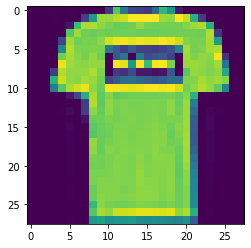

In [7]:
plt.imshow(x_train[1])
classes[y_train[1]]

'Sandals'

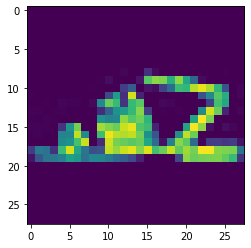

In [8]:
plt.imshow(x_train[1250])
classes[y_train[1250]]

'Dress'

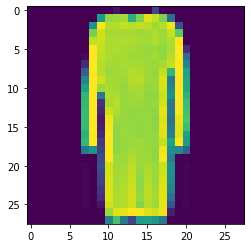

In [9]:
plt.imshow(x_train[25])
classes[y_train[25]]

In [10]:
X_train, X_test = x_train/255, x_test/255

In [11]:
model = Sequential()

model.add(Conv2D(28, 2, activation = "relu", kernel_initializer= 'he_uniform',))
model.add(MaxPool2D())

model.add(Conv2D(56, 2, activation = "relu", kernel_initializer= 'he_uniform',))
model.add(MaxPool2D())

model.add(Conv2D(112, 2, activation = "relu", kernel_initializer= 'he_uniform',))
model.add(MaxPool2D())

model.add(Flatten())



In [12]:
model.add(Dense(224, activation = "relu", kernel_initializer='he_uniform'))
model.add(Dense(112, activation = "relu", kernel_initializer='he_uniform'))
model.add(Dense(56, activation = "sigmoid"))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer="SGD", loss = tensorflow.keras.losses.sparse_categorical_crossentropy, metrics= ['accuracy'])


In [13]:
history = model.fit(X_train, y_train, epochs=15, batch_size = 40, validation_split = 0.1)

Epoch 1/15
1350/1350 [==============================] - 39s 28ms/step - loss: 1.3183 - accuracy: 0.5734 - val_loss: 0.8658 - val_accuracy: 0.7128
Epoch 2/15
1350/1350 [==============================] - 37s 27ms/step - loss: 0.7631 - accuracy: 0.7280 - val_loss: 0.6646 - val_accuracy: 0.7638
Epoch 3/15
1350/1350 [==============================] - 38s 28ms/step - loss: 0.6377 - accuracy: 0.7703 - val_loss: 0.5995 - val_accuracy: 0.7805
Epoch 4/15
1350/1350 [==============================] - 36s 26ms/step - loss: 0.5696 - accuracy: 0.7936 - val_loss: 0.5505 - val_accuracy: 0.8003
Epoch 5/15
1350/1350 [==============================] - 38s 28ms/step - loss: 0.5257 - accuracy: 0.8102 - val_loss: 0.5353 - val_accuracy: 0.8083
Epoch 6/15
1350/1350 [==============================] - 38s 28ms/step - loss: 0.4935 - accuracy: 0.8233 - val_loss: 0.4894 - val_accuracy: 0.8237
Epoch 7/15
1350/1350 [==============================] - 39s 29ms/step - loss: 0.4668 - accuracy: 0.8328 - val_loss: 0.4577 -

In [14]:
Y_Pred = model.predict(x_test).argmax(axis=1)

Y_Pred.shape

(10000,)

In [15]:
print(f'Accuracy is : {accuracy_score(Y_Pred, y_test)}')
print(f'F1 Score is : {f1_score(y_test, Y_Pred, average= "weighted")}.')
print(f'Precision is : {precision_score(y_test, Y_Pred, average="weighted")}.')
print(f'Recall is : {recall_score(y_test, Y_Pred, average = "weighted")}.')


Accuracy is : 0.827
F1 Score is : 0.8235056927927088.
Precision is : 0.8338766496812406.
Recall is : 0.827.


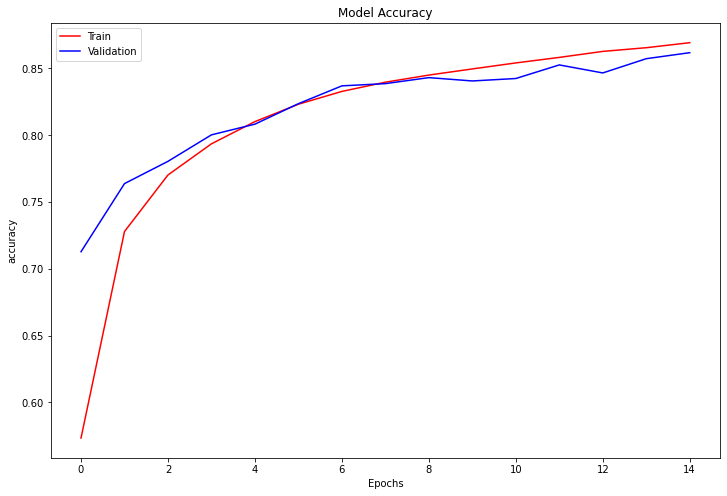

In [16]:
plt.figure(figsize = (12,8))
plt.plot(history.history['accuracy'], color = 'red', label = 'Train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'Validation')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.title('Model Accuracy')
plt.legend()
plt.show()

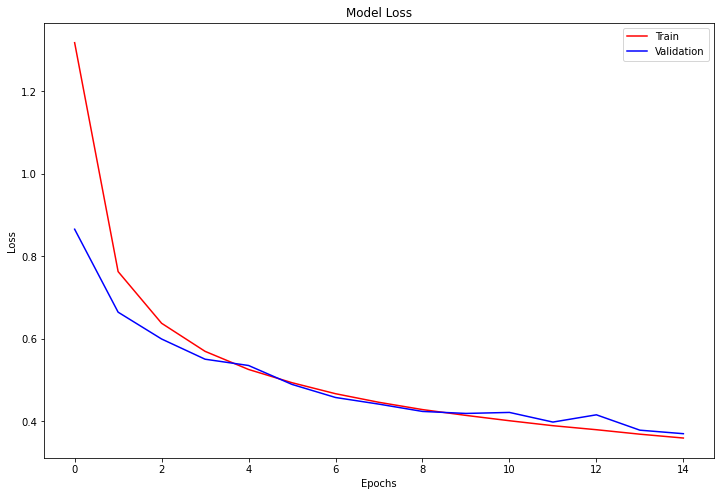

In [17]:
plt.figure(figsize = (12,8))
plt.plot(history.history['loss'], color = 'red', label = 'Train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'Validation')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Model Loss')
plt.legend()
plt.show()


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  140       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (40, 13, 13, 28)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (40, 12, 12, 56)          6328      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (40, 6, 6, 56)            0         
_________________________________________________________________
conv2d_2 (Conv2D)            (40, 5, 5, 112)           25200     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (40, 2, 2, 112)           0         
_________________________________________________________________
flatten (Flatten)            (40, 448)                 0

In [19]:
model.save(r'C:\Users\Vikas\Documents\Computer Learning\Data Science and AI Machine Learning\Hands On projects\Deep Learning\FMNIST\FMNIST_87.h5')